# Analysis - exp73

- Transfer/play experiments for exp73 best model.
- DQN_optuna
- There were four evaluations run on each the 20 replicate/seed models.
    1. self-play
    2. random opponent
    3. optimal opponent
    4. transfer on 5x5 -> 500x500 boards (random opponent)

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, model, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, f"eval_DQN_optuna_{model}_{int(r)}_monitor.csv")
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

## Learning data

In [2]:
path = "/Users/qualia/Code/azad/data/wythoff/exp73/"

opponents = ["self", 
          "random", 
          "optimal"] 

envs = ["Wythoff5x5", 
        "Wythoff10x10",
        "Wythoff15x15",
        "Wythoff50x50", 
        "Wythoff100x100", 
        "Wythoff150x150", 
        "Wythoff200x200", 
        "Wythoff250x250", 
        "Wythoff300x300", 
        "Wythoff350x350",
        "Wythoff400x400", 
        "Wythoff450x450", 
        "Wythoff500x500"]

opp_data = {}
for model in opponents:
    opp_data[model] = load_data(path, model, run_index=(2, 21))

env_data = {}
for model in envs:
    env_data[model] = load_data(path, f"transfer_{model}", run_index=(2, 21))

In [3]:
pprint(opp_data[opponents[0]][0].keys())

dict_keys(['file', 'episode', 'score', 'total_reward', 'winner'])


In [4]:
pprint(env_data[envs[0]][0].keys())

dict_keys(['file', 'episode', 'score', 'total_reward', 'winner'])


## Plot scores for all. 

Look at the natural variations

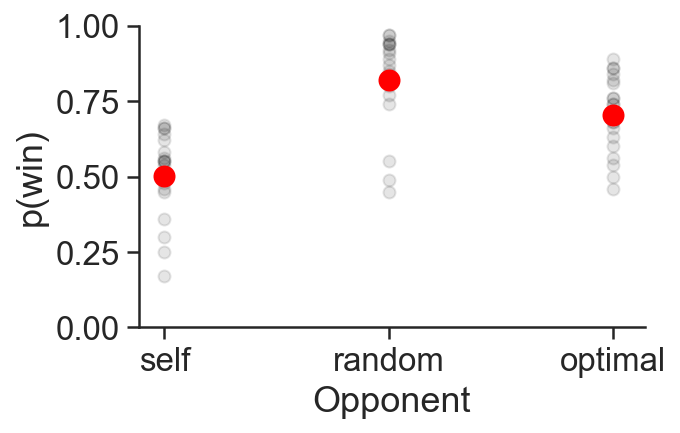

In [5]:
key = 'total_reward'
plt.figure(figsize=(5, 3))
for i, model in enumerate(opp_data):
    ys = []
    for r, mon in enumerate(opp_data[model]):
        y = mon[key][-1]/100
        ys.append(y)
        _ = plt.scatter(model, y, color='black', alpha=0.1)
    _ = plt.scatter(model, np.mean(ys), color='red', s=100)        
_ = plt.ylim(0, 1)
_ = plt.ylabel(f"p(win)")
_ = plt.tight_layout()
_ = plt.xlabel("Opponent")
_ = sns.despine()

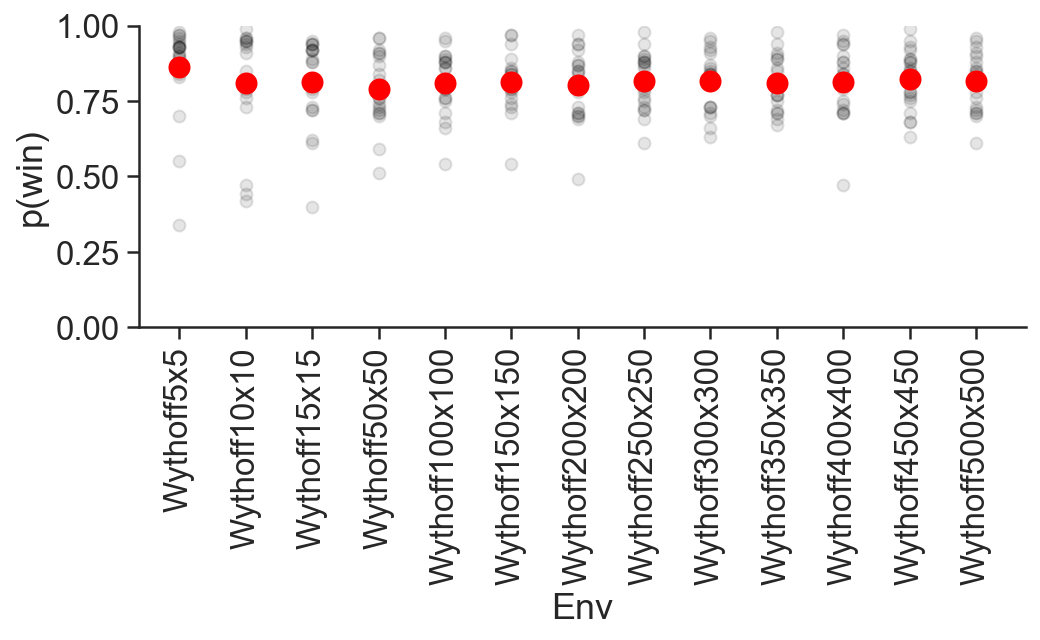

In [6]:
key = 'total_reward'
plt.figure(figsize=(8, 3))
for i, model in enumerate(env_data):
    ys = []
    for r, mon in enumerate(env_data[model]):
        y = mon[key][-1]/100
        ys.append(y)
        _ = plt.scatter(model, y, color='black', alpha=0.1)
    _ = plt.scatter(model, np.mean(ys), color='red', s=100)
_ = plt.ylim(0, 1)
_ = plt.ylabel(f"p(win)")
_ = plt.tight_layout()
_ = plt.xlabel("Env")
_ = plt.xticks(rotation=90)
_ = sns.despine()

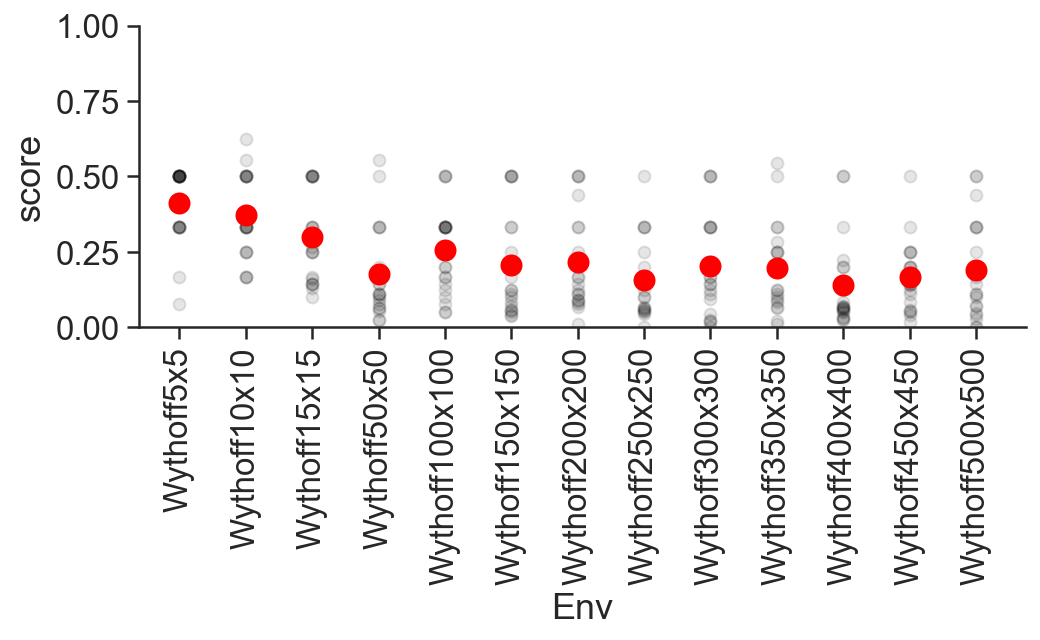

In [10]:
key = 'score'
plt.figure(figsize=(8, 3))
for i, model in enumerate(env_data):
    ys = []
    for r, mon in enumerate(env_data[model]):
        y = np.max(mon[key])
        ys.append(y)
        _ = plt.scatter(model, y, color='black', alpha=0.1)
    _ = plt.scatter(model, np.mean(ys), color='red', s=100)
_ = plt.ylim(0, 1)
_ = plt.ylabel(f"score")
_ = plt.tight_layout()
_ = plt.xlabel("Env")
_ = plt.xticks(rotation=90)
_ = sns.despine()